In [70]:
from PIL import Image, ImageDraw
import math

In [71]:
width = 700
height = 700

# Create a new image with white background
img = Image.new('RGB', (width, height), color='white')

# Create an ImageDraw object
draw = ImageDraw.Draw(img)

In [72]:
# x1, y1 = (20,10)
# x1, y1 = (40,10)
# x1, y1 = (20,10)
# x1, y1 = (20,10)
# x1, y1 = (20,10)


# path_points = [(x1, y1), (x2, y2), (x3, y3), ...]

In [73]:
def draw_mixed_path(draw, points, curve_segments=3, width=10, color='black'):
  # Ensure at least two points to draw a segment
  if len(points) < 2:
    return

  # Draw each segment of the path
  for i in range(len(points) - 1):
    x0, y0 = points[i]
    x1, y1 = points[i + 1]

    # Draw straight line segment
    if i % 2 == 0:
      draw.line([points[i], points[i + 1]], fill=(200,100,65), width=width)
    # Draw Bezier curve segment
    else:
      # Calculate control points for Bezier curve (adjust as needed)
      control1 = (x0 + (x1 - x0) // 2, y0)
      control2 = (x0 + (x1 - x0) // 2, y1)

      # Draw Bezier curve segment
      for t in range(0, curve_segments + 1):
        t /= curve_segments
        cx = (1 - t)**3 * x0 + 3 * (1 - t)**2 * t * control1[0] + 3 * (1 - t) * t**2 * control2[0] + t**3 * x1
        cy = (1 - t)**3 * y0 + 3 * (1 - t)**2 * t * control1[1] + 3 * (1 - t) * t**2 * control2[1] + t**3 * y1
        draw.ellipse(
          [cx - width/2, cy - width/2, cx + width/2, cy + width/2], 
          fill=(100,200,58), outline=(100,200,58)
        )


In [74]:
def draw_filled_mixed_polygon(
    draw, points, curve_segments=10, outline_width=2, 
    outline_color='black', fill_color='blue'
  ):
  # Ensure at least three points to draw a polygon
  if len(points) < 3:
    return

  # Draw the polygon outline with mixed segments
  for i in range(len(points)):
    x0, y0 = points[i]
    x1, y1 = points[(i + 1) % len(points)]

    # Draw straight line segment
    if i % 2 == 0:
      draw.line([points[i], points[(i + 1) % len(points)]], fill=outline_color, width=outline_width)
    # Draw Bezier curve segment
    else:
      # Calculate control points for Bezier curve (adjust as needed)
      control1 = (x0 + (x1 - x0) // 2, y0)
      control2 = (x0 + (x1 - x0) // 2, y1)

      # Draw Bezier curve segment
      for t in range(0, curve_segments + 1):
        t /= curve_segments
        cx = (1 - t)**3 * x0 + 3 * (1 - t)**2 * t * control1[0] + 3 * (1 - t) * t**2 * control2[0] + t**3 * x1
        cy = (1 - t)**3 * y0 + 3 * (1 - t)**2 * t * control1[1] + 3 * (1 - t) * t**2 * control2[1] + t**3 * y1
        draw.ellipse([cx - outline_width/2, cy - outline_width/2, cx + outline_width/2, cy + outline_width/2], fill=outline_color)

  # Fill the polygon with a solid color
  draw.polygon(points, fill=fill_color)


In [75]:
def draw_filled_curved_polygon(draw, points, curve_segments=10, outline_width=2, outline_color='black', fill_color='blue'):
    # Ensure at least three points to draw a polygon
    if len(points) < 3:
        return

    # Draw the polygon outline with curved segments
    for i in range(len(points)):
        # Current point
        x0, y0 = points[i]

        # Next point (loop back to the first point for the last segment)
        x1, y1 = points[(i + 1) % len(points)]

        # Calculate control points for Bezier curve (adjust as needed)
        control1 = (x0 + (x1 - x0) // 2, y0)
        control2 = (x0 + (x1 - x0) // 2, y1)

        # Draw Bezier curve segment
        for t in range(0, curve_segments + 1):
            t /= curve_segments
            cx = (1 - t)**3 * x0 + 3 * (1 - t)**2 * t * control1[0] + 3 * (1 - t) * t**2 * control2[0] + t**3 * x1
            cy = (1 - t)**3 * y0 + 3 * (1 - t)**2 * t * control1[1] + 3 * (1 - t) * t**2 * control2[1] + t**3 * y1
            draw.ellipse([cx - outline_width/2, cy - outline_width/2, cx + outline_width/2, cy + outline_width/2], fill=outline_color)
    draw.polygon(points, fill=fill_color)  


In [76]:
# Example path points
path_points = [(500, 100), (200, 50), (300, 150), (400, 100)]
polygon_points = [(100, 100), (200, 50), (300, 20), (400, 100)]

# Draw the mixed path
# draw_mixed_path(draw, path_points)
# draw_filled_mixed_polygon(draw, polygon_points)
draw_filled_curved_polygon(draw, polygon_points)

# Save or display the image
# Save or display the image
# img.save('mixed_path.png')
# img.save('mixed_polygon.png')
img.save('filled_curved_polygon.png')

# img.show()

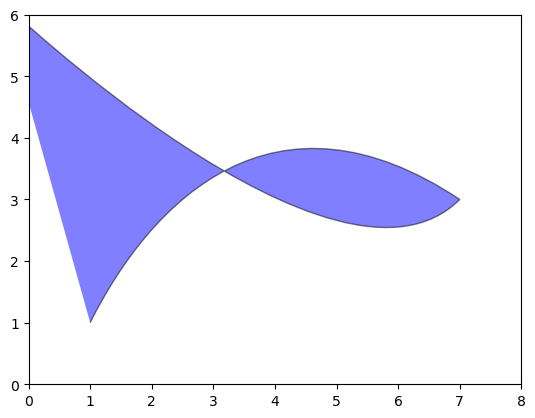

In [77]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Define the points of the polygon
polygon_points = [(1, 1), (2, 3), (4, 5), (7, 3), (5, 1)]

# Define the codes for each point: MOVETO for the first point, LINETO for the rest
codes = [Path.MOVETO] + [Path.CURVE4] * (len(polygon_points) - 1)

# Create the Path object
path = Path(polygon_points, codes)

# Plotting
fig, ax = plt.subplots()
patch = PathPatch(path, facecolor='blue', edgecolor='black', alpha=0.5)
ax.add_patch(patch)

# Set limits and show plot
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_aspect('equal', adjustable='box')
plt.show()

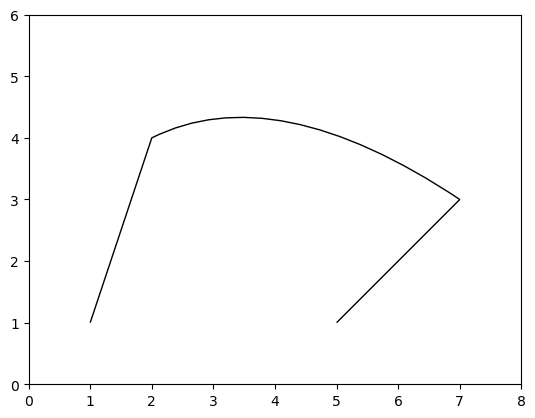

In [78]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Define points for the path
points = [(1, 1), (2, 4), (4, 5), (7, 3), (5, 1)]

# Define codes: MOVETO for the first point, LINETO for straight lines, CURVE3 for quadratic Bezier curves
codes = [Path.MOVETO] + [Path.LINETO] * (len(points) - 1)

# Insert a CURVE3 code in the middle for a curved segment
codes[2] = Path.CURVE3

# Create the Path object
path = Path(points, codes)

# Plotting
fig, ax = plt.subplots()
patch = PathPatch(path, facecolor='none', edgecolor='black')
ax.add_patch(patch)

# Set limits and show plot
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_aspect('equal', adjustable='box')
plt.show()

In [80]:
from PIL import Image, ImageDraw

# Create a new image with white background
width, height = 400, 400
img = Image.new('RGB', (width, height), color='white')

# Create an ImageDraw object
draw = ImageDraw.Draw(img)

# Define the bounding box: (left, top, right, bottom)
bounding_box = [100, 100, 300, 300]

# Define the start and end angles (in degrees)
start_angle = 0
end_angle = 90

# Draw and fill the pie slice
draw.pieslice(bounding_box, start=start_angle, end=end_angle, fill='blue', outline='black')

# Save or display the image
img.save('pie_slice.png')

In [81]:
from PIL import Image, ImageDraw
import math

# Create a new image with white background
width, height = 400, 400
img = Image.new('RGB', (width, height), color='white')

# Create an ImageDraw object
draw = ImageDraw.Draw(img)

# Center of the pie slice
center = (200, 200)

# Radii for the outer and inner arcs
outer_radius = 100
inner_radius = 50

# Define the start and end angles (in degrees)
start_angle = 0
end_angle = 90

# Function to convert polar coordinates to cartesian
def polar_to_cartesian(center, radius, angle):
    angle_rad = math.radians(angle)
    return (center[0] + radius * math.cos(angle_rad), center[1] + radius * math.sin(angle_rad))

# Points for the outer arc
outer_points = [polar_to_cartesian(center, outer_radius, angle) for angle in range(start_angle, end_angle + 1)]

# Points for the inner arc (reversed)
inner_points = [polar_to_cartesian(center, inner_radius, angle) for angle in range(end_angle, start_angle - 1, -1)]

# Combine the points to form the polygon
slice_points = [center] + outer_points + inner_points

# Draw and fill the pie slice
draw.polygon(slice_points, fill='blue', outline='black')

# Save or display the image
img.save('pie_slice_with_two_radii.png')